In [2]:
import h5py
import matplotlib.pyplot as plt
import numpy as np

from neuropacks import NHP
from utils import apply_kalman_filter, apply_linear_decoder
%matplotlib inline

In [2]:
monkey = 'indy_20160407_02'

In [3]:
results_path = '/home/psachdeva/fits/uoineuro/cur/' + monkey + '.h5'
data_path = '/storage/data/nhp/' + monkey + '.mat'

In [4]:
results = h5py.File(results_path, 'r')
nhp = NHP(data_path=data_path)

In [8]:
np.arange(5)[0:]

array([0, 1, 2, 3, 4])

In [6]:
Y = results['data/Y']

positions = nhp.get_binned_positions(bin_width=0.25)
x = positions[:, 0]
y = positions[:, 1]

In [7]:
ks = np.arange(30, 136, 2)
n_ks = ks.size
reps = 20

In [8]:
np.mean(results['uoi/reconstructions'], axis=0)

array([3.40993062e-01, 3.28030517e-01, 3.16656019e-01, 2.96659524e-01,
       2.87554117e-01, 2.71043992e-01, 2.65572438e-01, 2.49435204e-01,
       2.33596544e-01, 2.20134511e-01, 2.11381826e-01, 1.92375729e-01,
       1.90387822e-01, 1.75592294e-01, 1.65477939e-01, 1.55751495e-01,
       1.49500570e-01, 1.41588589e-01, 1.34468137e-01, 1.30184226e-01,
       1.24727189e-01, 1.21042062e-01, 1.15142697e-01, 1.07473742e-01,
       1.04417933e-01, 9.84065704e-02, 8.97225281e-02, 8.31358205e-02,
       7.73225546e-02, 6.91380136e-02, 6.28826785e-02, 6.02628034e-02,
       5.80995196e-02, 5.32185718e-02, 4.62710191e-02, 4.13170868e-02,
       3.68170770e-02, 3.34660231e-02, 2.90911145e-02, 2.47459372e-02,
       2.20465208e-02, 1.83203289e-02, 1.62820679e-02, 1.27669524e-02,
       1.12606463e-02, 8.57888702e-03, 5.68557359e-03, 4.15073325e-03,
       2.97841232e-03, 2.08157694e-03, 1.59070179e-03, 6.90323452e-04,
       3.15368696e-04])

In [9]:
np.mean(results['uoi/reconstructions'], axis=0)

array([3.40993062e-01, 3.28030517e-01, 3.16656019e-01, 2.96659524e-01,
       2.87554117e-01, 2.71043992e-01, 2.65572438e-01, 2.49435204e-01,
       2.33596544e-01, 2.20134511e-01, 2.11381826e-01, 1.92375729e-01,
       1.90387822e-01, 1.75592294e-01, 1.65477939e-01, 1.55751495e-01,
       1.49500570e-01, 1.41588589e-01, 1.34468137e-01, 1.30184226e-01,
       1.24727189e-01, 1.21042062e-01, 1.15142697e-01, 1.07473742e-01,
       1.04417933e-01, 9.84065704e-02, 8.97225281e-02, 8.31358205e-02,
       7.73225546e-02, 6.91380136e-02, 6.28826785e-02, 6.02628034e-02,
       5.80995196e-02, 5.32185718e-02, 4.62710191e-02, 4.13170868e-02,
       3.68170770e-02, 3.34660231e-02, 2.90911145e-02, 2.47459372e-02,
       2.20465208e-02, 1.83203289e-02, 1.62820679e-02, 1.27669524e-02,
       1.12606463e-02, 8.57888702e-03, 5.68557359e-03, 4.15073325e-03,
       2.97841232e-03, 2.08157694e-03, 1.59070179e-03, 6.90323452e-04,
       3.15368696e-04])

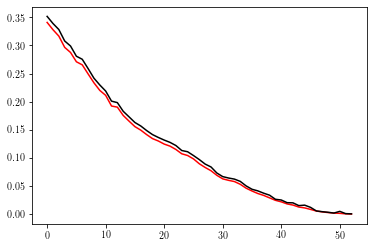

In [10]:
plt.plot(np.mean(results['uoi/reconstructions'], axis=0), color='r')
plt.plot(np.mean(results['css/reconstructions'], axis=0), color='k')

In [9]:
uoi_scores = np.zeros((reps, n_ks, 2))
css_scores = np.zeros((reps, n_ks, 2))

In [10]:
_, _, _, base_corrs = apply_kalman_filter(x, y, Y, score=True, train_frac=0.8)

In [11]:
for rep in range(reps):
    print('Rep ', rep)
    for k_idx, k in enumerate(ks):
        print('kidx ', k_idx)
        uoi_c = results['uoi/columns/%s/%s' %(rep, k)][:]
        _, _, _, corrs = apply_kalman_filter(x, y, Y[:, uoi_c], score=True, train_frac=0.8)
        uoi_scores[rep, k_idx, 0] = corrs[0]
        uoi_scores[rep, k_idx, 1] = corrs[1]
        
        css_c = results['css/columns/%s/%s' %(rep, k)][:]
        _, _, _, corrs = apply_kalman_filter(x, y, Y[:, css_c], score=True, train_frac=0.8)
        css_scores[rep, k_idx, 0] = corrs[0]
        css_scores[rep, k_idx, 1] = corrs[1]

Rep  0
kidx  0
kidx  1
kidx  2
kidx  3
kidx  4
kidx  5
kidx  6
kidx  7
kidx  8
kidx  9
kidx  10
kidx  11
kidx  12
kidx  13
kidx  14
kidx  15
kidx  16
kidx  17
kidx  18
kidx  19
kidx  20
kidx  21
kidx  22
kidx  23
kidx  24
kidx  25
kidx  26
kidx  27
kidx  28
kidx  29
kidx  30
kidx  31
kidx  32
kidx  33
kidx  34
kidx  35
kidx  36
kidx  37
kidx  38
kidx  39
kidx  40
kidx  41
kidx  42
kidx  43
kidx  44
kidx  45
kidx  46
kidx  47
kidx  48
kidx  49
kidx  50
kidx  51
kidx  52
Rep  1
kidx  0
kidx  1
kidx  2
kidx  3
kidx  4
kidx  5
kidx  6
kidx  7
kidx  8
kidx  9
kidx  10
kidx  11
kidx  12
kidx  13
kidx  14
kidx  15
kidx  16
kidx  17
kidx  18
kidx  19
kidx  20
kidx  21
kidx  22
kidx  23
kidx  24
kidx  25
kidx  26
kidx  27
kidx  28
kidx  29
kidx  30
kidx  31
kidx  32
kidx  33
kidx  34
kidx  35
kidx  36
kidx  37
kidx  38
kidx  39
kidx  40
kidx  41
kidx  42
kidx  43
kidx  44
kidx  45
kidx  46
kidx  47
kidx  48
kidx  49
kidx  50
kidx  51
kidx  52
Rep  2
kidx  0
kidx  1
kidx  2
kidx  3
kidx  4
kidx 

KeyboardInterrupt: 

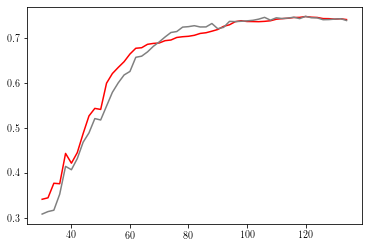

In [24]:
plt.plot(np.arange(30, 136, 2), np.mean(np.mean(uoi_scores, axis=0), axis=1), color='r')
plt.plot(np.arange(30, 136, 2), np.mean(np.mean(css_scores, axis=0), axis=1), color='gray')

In [28]:
base_corrs

array([0.76222251, 0.71788591, 0.68417092, 0.72842891])

In [23]:
results['css/columns/%s/%s' %(0, 30)][:]

array([ 34,  51,  96,  99, 102, 124])

In [ ]:
results['uoi/columns/%s/%s' %(rep, k)][:]

In [20]:
uoi_scores[:, 0, 0]

array([0.11615337, 0.2204698 , 0.23416204, 0.24533073, 0.05779622,
       0.16972479, 0.2189941 , 0.25265446, 0.35915334, 0.43767528,
       0.20420957, 0.13070878, 0.09673795, 0.24734725, 0.23244773,
       0.23309504, 0.20126211, 0.18661181, 0.2253523 , 0.21029744])

In [21]:
css_scores[:, 0, 0]

array([0.36851759, 0.49782553, 0.34257434, 0.66436784, 0.46489741,
       0.33980718, 0.34488654, 0.333291  , 0.55643612, 0.47355015,
       0.39974345, 0.35117034, 0.52562747, 0.39943316, 0.38208398,
       0.07504085, 0.16023959, 0.46683587, 0.08905512, 0.40106966])

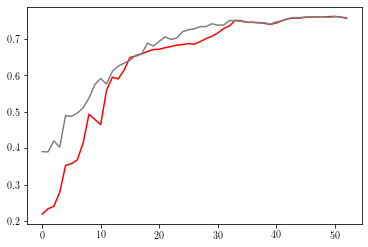

In [16]:
plt.plot(np.median(uoi_scores, axis=0)[:, 0], color='r')
plt.plot(np.median(css_scores, axis=0)[:, 0], color='gray')

In [12]:
n_cols = [[results['uoi/columns/' + str(rep) + '/' + str(idx)][:].size for idx in np.arange(30, 136, 2)] for rep in range(20)]

[[<matplotlib.lines.Line2D at 0x7fc903260d10>],

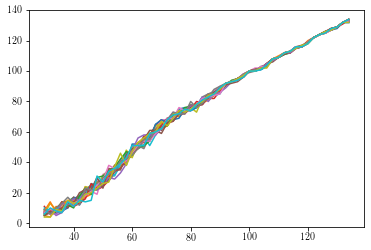

In [15]:
[plt.plot(np.arange(30, 136, 2), n_cols[idx]) for idx in range(20)]

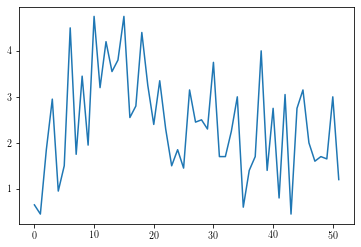

In [27]:
plt.plot(np.ediff1d(np.mean(np.array(n_cols), axis=0)))